# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_results.csv')


In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_information
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
address
sample_id_given_by_the_sample_provider
submitting_lab
sample_id_given_by_the_submitting_laboratory
authors
submitter
submission_date
query
strand
%n
length(nt)
length(aa)
#muts
%muts
#uniquemuts
%uniquemuts
#existingmuts
%existingmuts
symbol
reference
uniquemutlist
existingmutlist
clade
ifexistspecialchar


# Preprocessing and cleaning the data

In [4]:
#important features
#important features
start_data_row = 0
Final_data_row = 1129
Data = data.loc[start_data_row:Final_data_row,['location','gender','age','status']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))


In [5]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.index = range(len(Data))


In [6]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='n/a'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='NA'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='-'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='Unknown'].index, inplace=True)
Data.index = range(len(Data))

In [7]:
#organizing the location based on the continent and country (For USA: continent,country, and state )
Location = Data.location.str.split('/')
listToStr_location = list()
for i in range(len(Location)):  
    if Location[i][1:2][0]!=' USA ':
        Location[i] = Location[i][0:2]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
    else:
        Location[i] = Location[i][0:3]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
listToStr_location

['Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   Bangladesh ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Asia   China ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 'Europe   Belgium ',
 

In [8]:
#replacing the age that were in months to year

Data['age'] = Data['age'].str.replace('months','')
Data['age'] = Data['age'].str.replace('month','')
Data['age'] = Data['age'].str.replace('s','')

for i in range(1,len(Data)):
    index_1 = Data.age[i].find(',') 
    index_2 = Data.age[i].find('-') 
    index_3 = Data.age[i].find('unknown') 
    index_4 = Data.age[i].find('week')
    index_5 = Data.age[i].find('Unknown') 
    if index_1!=-1:
        Data.age[i] = Data.age[i][:index_1]
        Data.age[i] = int(float(Data.age[i])/12)
    if index_2!=-1:
        Data.age[i] = int((float(Data.age[i][index_2+1:])+float(Data.age[i][:index_2]))/2)
    if index_3!=-1:
        Data.age[i] = 'NaN'
    if index_4!=-1:
        Data.age[i] = Data.age[i][:index_4]
        Data.age[i] = int(float(Data.age[i])/4)
    if index_5!=-1:
        Data.age[i] = 'NaN'



In [9]:
#deleting the >, 's and s from age
Data['age'] = Data['age'].str.replace('>','')
Data['age'] = Data['age'].str.replace('s','')
Data['age'] = Data['age'].str.replace("'",'')

In [10]:
Data.replace(['female','Female'],value= ['Female','Female'], inplace=True)
Data.replace(['male','Male'],value= ['Male','Male'], inplace=True)        

In [11]:
#the unknown gender is set to missing category
for i in range(1,len(Data)):
    index_4 = Data.gender[i].find('unknown') 
    if index_4!=-1:
        Data.gender[i] = 'missing'


In [12]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

In [13]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['location']]),pd.get_dummies(Data[['gender']]), Data[['age','status']]], axis=1)
Data_model


,location_Africa / Morocco,location_Africa / Nigeria / Kwara State,location_Africa / Nigeria / Osun State,location_Africa / Nigeria / Oyo State,location_Asia / Bangladesh / Chattogram,location_Asia / Bangladesh / Dhaka,location_Asia / Bangladesh / Narayanganj,location_Asia / China / Beijing,location_Asia / China / Guangdong / Guangzhou,location_Asia / China / Heilongjiang / Harbin,...,location_South America / Colombia / Valle del Cauca / Trujillo,location_South America / Colombia / Valle del Cauca / Tulua,location_South America / Colombia / Valle del Cauca / Yumbo,location_South America / Colombia / Villavicencio / Meta,gender_Female,gender_Male,gender_Woman,gender_missing,age,status
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,43,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,85,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,42,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,48,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,27,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,45,0
1007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,63,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,55,0


In [14]:
#checking the balance in the data
Data_model['status'].value_counts()


0    969
1     41
Name: status, dtype: int64

# Logistic regression model

In [15]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()



0    969
1     41
Name: status, dtype: int64

In [16]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)
X_train

,location_Africa / Morocco,location_Africa / Nigeria / Kwara State,location_Africa / Nigeria / Osun State,location_Africa / Nigeria / Oyo State,location_Asia / Bangladesh / Chattogram,location_Asia / Bangladesh / Dhaka,location_Asia / Bangladesh / Narayanganj,location_Asia / China / Beijing,location_Asia / China / Guangdong / Guangzhou,location_Asia / China / Heilongjiang / Harbin,...,location_South America / Colombia / Valle del Cauca / Palmira,location_South America / Colombia / Valle del Cauca / Trujillo,location_South America / Colombia / Valle del Cauca / Tulua,location_South America / Colombia / Valle del Cauca / Yumbo,location_South America / Colombia / Villavicencio / Meta,gender_Female,gender_Male,gender_Woman,gender_missing,age
160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.0
468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56.0
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,29.0
783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,54.0
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0


### Imputing the unknown data using KNN

In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(X_train[['age']])
X_train['age']=imputer.transform(X_train[['age']])
X_test['age']=imputer.transform(X_test[['age']])





C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Balancing the data

In [18]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

### Scaling the data

In [19]:
#Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [20]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=200,max_depth = 60, max_features = 'log2')
# Fit on training data
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
RF_probs = model.predict_proba(X_test)
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))



R^2 _train= 0.9948387096774194
R^2 _test= 0.9554455445544554


In [21]:
### Cross validation 

#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())



Cross-Validation Accuracy Scores [0.91612903 0.99354839 1.         0.99354839 0.97419355 0.96129032
 0.97419355 0.98709677 0.98709677 1.        ]
CV-scores_min =  0.9161290322580645
CV_scores_mean = 0.9787096774193549
CV_scores_max = 1.0


In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
101,0,0
414,1,1
31,0,0
966,0,0
248,0,0
36,0,0
184,0,0
882,0,0
22,0,0
219,0,0


In [23]:
### Performance measurement metrics

import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

from sklearn.metrics import precision_recall_curve
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_hat)

from sklearn.metrics import f1_score
# calculate F1 score
f1 = f1_score(y_test, y_hat)
print('f1 score =', f1)

#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
RF_probs = model.predict_proba(X_test)
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
print( 'roc_auc =', roc_auc_score(y_test, RF_probs[:,1]) )

Mean Absolute Error: 0.04455445544554455
Mean Squared Error: 0.04455445544554455
Root Mean Squared Error: 0.21107926341908756
f1 score = 0.5263157894736842
roc_auc = 0.926868556701031


In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
RF_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
RF_probs = RF_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (RF_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.927


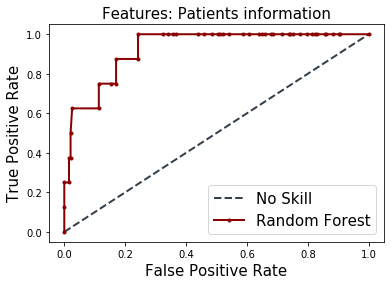

In [25]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',  linewidth=2,  color = '#333F4B')
pyplot.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest', linewidth=2, color = 'darkred')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=15)
pyplot.ylabel('True Positive Rate',fontsize=15)
pyplot.title('Features: Patients information',fontsize=15)
# show the legend
pyplot.legend(fontsize=15)
# show the plot
pyplot.show()

In [26]:

from sklearn.metrics import recall_score
recall_score(y_test, y_hat, average='weighted')

0.9554455445544554